In [9]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

pf1 = '/opt/limi/hello-opencv/build/deploy/images/switch/c.jpg'
pf2 = '/opt/limi/hello-opencv/build/deploy/data/home.jpg'
pf3 = '/opt/limi/hello-opencv/build/deploy/data/smarties.png'

In [1]:

import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread("/opt/limi/hello-opencv/build/deploy/images/switch/c.jpg")
mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 包含前景的矩形，格式为 (x,y,w,h)
# 为了确定rect，反复调整ROI
# x = 190
# y = 90
# w = 300
# h = 750
# ROI = img[y:y+h, x:x+w]
# cv2.imshow("rect", ROI)

rect = (190, 90, 300, 750)

# 函数返回值是迭代更新的mask, bgdModel, fgdModel。
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
img = img*mask2[:, :, np.newaxis]

# plt.imshow(img), plt.colorbar(), plt.show()
cv2.imshow("fg", img)
plt.imshow(mask), plt.title("mask"), plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

# 经过测试发现，还是缺少一些部分，下面进行修改。完善。

<Figure size 640x480 with 1 Axes>

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/opt/limi/hello-opencv/build/deploy/images/switch/c.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', gray)
_, thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# show thresh
cv2.imshow('thresh', thresh)
#
kernel = np.ones((3, 3), np.uint8)
# noise removal
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
cv2.imshow('opening', opening)
# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)
cv2.imshow('sure_bg', sure_bg)
# finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
print('dist_transform', dist_transform.max())
_, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
# finding unknown region
sure_fg = np.uint8(sure_fg)
unknow = cv2.subtract(sure_bg, sure_fg)
# marker labelling
_, markers = cv2.connectedComponents(sure_fg)
# add one to all labels so that sure background is not 0, but 1
markers = markers+1
# now, mark the region of unknown with zero
markers[unknow==255] = 0
cv2.imshow('unknow', unknow)

markers = cv2.watershed(img, markers)
img[markers==-1]=[255, 0, 0]
cv2.imshow('img', img)
img2 = cv2.cvtColor(img.copy(), cv2.COLORMAP_JET)
# img2 = cv2.applyColorMap(img.copy(), cv2.COLORMAP_JET)
cv2.imshow('img2', img2)
cv2.waitKey(0)

dist_transform 303.21634


In [ ]:
import cv2
import numpy as np

img = cv2.imread('/opt/limi/hello-opencv/build/deploy/images/switch/c.jpg')
cv2.imshow('img',img)

# 将图像转化为灰度图像
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 阈值化处理
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# cv2.imshow('thresh',thresh)

#noise removal
#opening operator是先腐蚀后膨胀，可以消除一些细小的边界，消除噪声
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
# cv2.imshow('opening',opening)

#sure background area
sure_bg=cv2.dilate(opening,kernel,iterations=3)
# cv2.imshow('bg',sure_bg)

#finding sure foreground area
dist_transfrom=cv2.distanceTransform(opening,cv2.DIST_L2 ,5)
#cv2.imshow('dist_transfrom',dist_transfrom)
ret,sure_fg=cv2.threshold(dist_transfrom,0.7*dist_transfrom.max(),255,0)

# cv2.imshow('sure_fg',sure_fg)

#finding unknow region
sure_fg=np.uint8(sure_fg)
unknow=cv2.subtract(sure_bg,sure_fg) #背景-前景
# cv2.imshow('unknow',unknow)

ret,maker=cv2.connectedComponents(sure_fg)
maker=maker+1
maker[unknow==255]=0

maker = cv2.watershed(img,maker)
# cv2.imshow('maker',maker)
img[maker == -1] = [0,0,255]
cv2.imshow('result',img)

if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()

In [ ]:
image = cv2.imread("/opt/limi/hello-opencv/build/deploy/images/switch/c.jpg")
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
lower_white = np.array([220, 220, 220], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)
mask = cv2.inRange(resized, lower_white, upper_white) # could also use threshold
res = cv2.bitwise_not(resized, resized, mask)
cv2.imshow('res', res) # gives black background

In [ ]:
src = cv2.imread("/opt/limi/hello-opencv/build/deploy/images/switch/c.jpg", 1)          # Reads in image source
colors_count = {}                      # Empty dictionary container to hold the colour frequencies
 
(channel_b, channel_g, channel_r) = cv2.split(self.src) # Splits image Mat into 3 color channels in individual 2D arrays

channel_b = channel_b.flatten()                         # Flattens the 2D single channel array so as to make it easier to iterate over it
channel_g = channel_g.flatten()                         #                   &quot;&quot;
channel_r = channel_r.flatten()                         #                   &quot;&quot;

for i in xrange(len(channel_b)):
    RGB = &quot;(&quot; + str(channel_r[i]) + &quot;,&quot; + str(channel_g[i]) + &quot;,&quot; + str(channel_b[i]) + &quot;)&quot;
    if RGB in self.colors_count:
        self.colors_count[RGB] += 1
    else:
        self.colors_count[RGB] = 1

print(Colours counted);

for keys in sorted(self.colors_count, key=self.colors_count.__getitem__):       # Sorts dictionary by value
    print(keys, colors_count[keys])
                
waitKey(0)                                  # Waits for keypress before closing


In [ ]:
import cv2
import  numpy as np

# img=cv2.imread('/opt/limi/hello-opencv/build/deploy/images/switch/c.jpg')
img=cv2.imread('/opt/limi/hello-opencv/build/deploy/data/home.jpg')
# Scaling
rows,cols,channels = img.shape
img=cv2.resize(img,None,fx=0.5,fy=0.5)
rows,cols,channels = img.shape
cv2.imshow('img',img)

# HSV conversion
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_blue=np.array([90,70,70])
upper_blue=np.array([110,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
cv2.imshow('Mask', mask)

# Corrosion Expansion
erode=cv2.erode(mask,None,iterations=1)
cv2.imshow('erode',erode)
dilate=cv2.dilate(erode,None,iterations=1)
cv2.imshow('dilate',dilate)

# ergodic substitution
for i in range(rows):
    for j in range(cols):
        if dilate[i,j]==255:
            img[i, j]= (0, 0, 255)# Replace the color here for the BGR channel
cv2.imshow('res',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

# newmask is the mask image I manually labelled
newmask = cv2.imread(pf2,0)

# whereever it is marked white (sure foreground), change mask=1
# whereever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

# newmask is the mask image I manually labelled
newmask = cv2.imread(pf2,0)

# whereever it is marked white (sure foreground), change mask=1
# whereever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
#importing required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

#reading the image
image = cv2.imread(pf3) # coins.jpg
#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#apply thresholding
ret,thresh = cv2.threshold(gray,0,250,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#get a kernel
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers==-1] = [255,0,0]

plt.imshow(sure_fg)

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

# newmask is the mask image I manually labelled
newmask = cv2.imread(pf2,0)

# whereever it is marked white (sure foreground), change mask=1
# whereever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

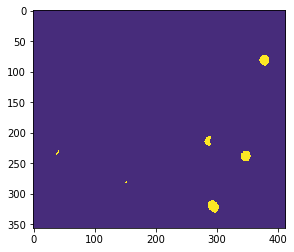

In [14]:
#importing required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

#reading the image
image = cv2.imread(pf3) # coins.jpg
#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#apply thresholding
ret,thresh = cv2.threshold(gray,0,250,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#get a kernel
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers==-1] = [255,0,0]

plt.imshow(sure_fg)